In [1]:
# /// script
# requires-python = ">=3.10"
# dependencies = [
#     "imageio[tifffile]",
#     "scenex[jupyter,pygfx]",
# ]
# ///

RFBOutputContext()

JupyterRenderCanvas(css_height='600.0px', css_width='600.0px')
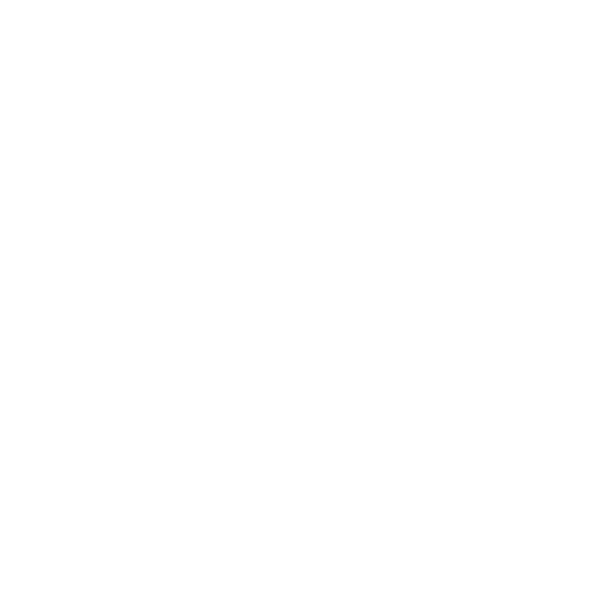

In [ ]:
import cmap
import numpy as np

import scenex as snx

image = snx.Image(
    data=np.random.randint(0, 255, (200, 200)).astype(np.uint8),
    cmap=cmap.Colormap("viridis"),
    transform=snx.Transform().scaled((1.3, 0.5)).translated((-40, 20)),
    clims=(0, 255),
    opacity=0.7,
)
points = snx.Points(
    coords=np.random.randint(0, 200, (100, 2)).astype(np.uint8),
    size=5,
    face_color=snx.UniformColor(color=cmap.Color("coral")),
    edge_color=snx.UniformColor(color=cmap.Color("purple")),
    transform=snx.Transform().translated((0, -50)),
    interactive=True,
)

view = snx.View(
    blending="default",
    scene=snx.Scene(
        children=[image, points]
    ),
    camera=snx.Camera(controller=snx.PanZoom(), interactive=True),
    on_resize=snx.Letterbox()
)

canvas = snx.show(view)

In [3]:
import random
from scenex.app.events import MouseEvent

random.seed(0xdeadbeef)
colors = ["blue", "red", "yellow", "green"]

def recolor_points(event) -> bool:
    if isinstance(event, MouseEvent):
        for node, distance in event.world_ray.intersections(view.scene):
            if node is points: 
                node.face_color = colors[random.randint(0, len(colors) - 1)]
    return False

view.set_event_filter(recolor_points)